iris 데이터셋을 사용하여 군집 분석 (k-평균, 각 종 linkage, DBSCAN)을 행하시오.

 

1. 군집 분석시 엘보우 방법, 실루엣 그림을 사용하시오.

2. 각 종 linkage 각 각에 대하여 덴드로그램을 그리고 특징을 설명하시오.

 

 


In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline

In [51]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2 , 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [52]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

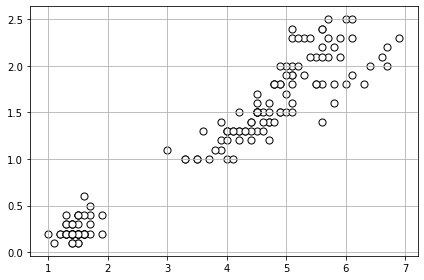

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
from sklearn.cluster import KMeans

# (default) n_init=10, max_iter=300, tol=1e-04
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

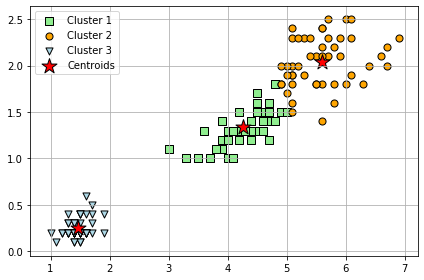

In [56]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

cluster2 cluster3의 분류가 조금 어려움

In [57]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 31.37


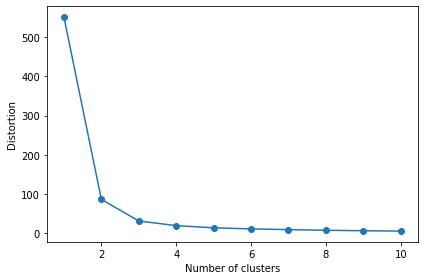

In [58]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

k=3이 가장 적합함

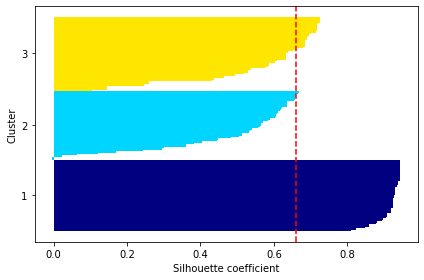

In [59]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

1은 잘 분류되지만 2와 3은 안 좋다.

In [60]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['sepal width', 'petal length']  
labels=[]
for i in range(1,151):
    labels.append(i)
print(labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


In [61]:
df = pd.DataFrame(X, columns=variables, index=labels)
df

,sepal width,petal length
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0
149,5.4,2.3


In [62]:
from scipy.cluster.hierarchy import linkage

In [63]:
# correct approach: Condensed distance matrix : complete

row_clusters_complete = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters_complete,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,2.0,36.0,0.000000,2.0
cluster 4,3.0,7.0,0.000000,2.0
cluster 5,8.0,151.0,0.000000,4.0
...,...,...,...,...
cluster 145,291.0,293.0,1.562050,48.0
cluster 146,280.0,292.0,1.824829,46.0
cluster 147,289.0,294.0,2.158703,54.0
cluster 148,290.0,295.0,3.984972,96.0


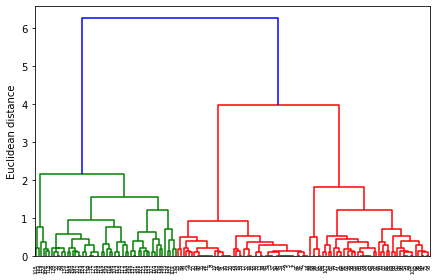

In [64]:
from scipy.cluster.hierarchy import dendrogram
###complete

row_dendr = dendrogram(row_clusters_complete, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

2와 3이 가깝다. 

In [65]:
# correct approach: Condensed distance matrix : single

row_clusters_single = linkage(pdist(df, metric='euclidean'), method='single')
pd.DataFrame(row_clusters_single,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,8.0,151.0,0.000000,4.0
cluster 4,28.0,152.0,0.000000,5.0
cluster 5,33.0,153.0,0.000000,6.0
...,...,...,...,...
cluster 145,288.0,293.0,0.223607,97.0
cluster 146,64.0,294.0,0.282843,98.0
cluster 147,134.0,295.0,0.282843,99.0
cluster 148,98.0,296.0,0.316228,100.0


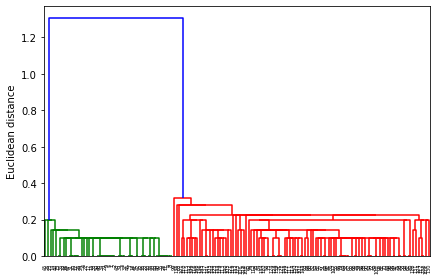

In [66]:
from scipy.cluster.hierarchy import dendrogram

### single

row_dendr = dendrogram(row_clusters_single, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

다른 방법보다 1과 2의 거리가 가깝다.

In [67]:
# correct approach: Condensed distance matrix : average

row_clusters_average = linkage(pdist(df, metric='euclidean'), method='average')
pd.DataFrame(row_clusters_average,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,2.0,36.0,0.000000,2.0
cluster 4,3.0,7.0,0.000000,2.0
cluster 5,8.0,151.0,0.000000,4.0
...,...,...,...,...
cluster 145,286.0,293.0,0.800141,46.0
cluster 146,287.0,291.0,1.003007,46.0
cluster 147,292.0,294.0,1.181720,54.0
cluster 148,295.0,296.0,1.528464,100.0


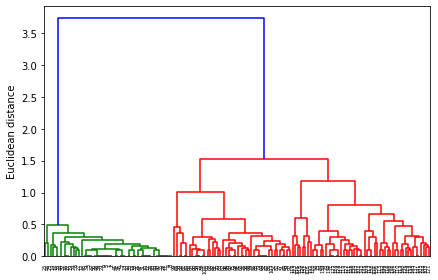

In [68]:
from scipy.cluster.hierarchy import dendrogram

### average

row_dendr = dendrogram(row_clusters_average, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [69]:
# correct approach: Condensed distance matrix : weighted

row_clusters_weighted = linkage(pdist(df, metric='euclidean'), method='weighted')
pd.DataFrame(row_clusters_weighted,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,2.0,36.0,0.000000,2.0
cluster 4,3.0,7.0,0.000000,2.0
cluster 5,8.0,151.0,0.000000,4.0
...,...,...,...,...
cluster 145,285.0,291.0,0.850666,60.0
cluster 146,277.0,293.0,1.152141,34.0
cluster 147,288.0,294.0,1.283311,66.0
cluster 148,295.0,296.0,2.562156,100.0


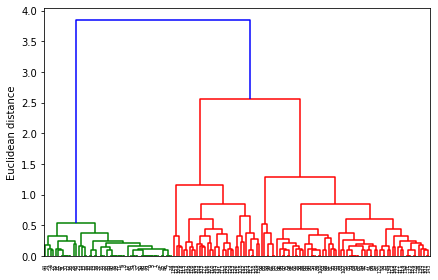

In [70]:
from scipy.cluster.hierarchy import dendrogram

### weighted
row_dendr = dendrogram(row_clusters_weighted, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [71]:
# correct approach: Condensed distance matrix : centroid

row_clusters_centroid = linkage(pdist(df, metric='euclidean'), method='centroid')
pd.DataFrame(row_clusters_centroid,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,3.0,7.0,0.000000,2.0
cluster 4,10.0,152.0,0.000000,3.0
cluster 5,15.0,21.0,0.000000,2.0
...,...,...,...,...
cluster 145,284.0,292.0,0.718799,46.0
cluster 146,289.0,291.0,0.960973,46.0
cluster 147,293.0,294.0,1.112702,54.0
cluster 148,295.0,296.0,1.493626,100.0


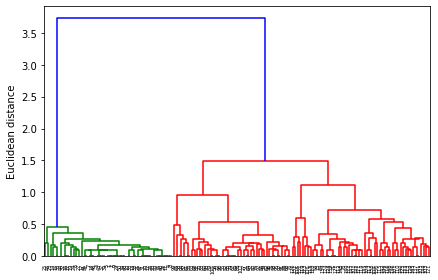

In [72]:
from scipy.cluster.hierarchy import dendrogram

### centroid

row_dendr = dendrogram(row_clusters_centroid, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [73]:
# correct approach: Condensed distance matrix : median

row_clusters_median = linkage(pdist(df, metric='euclidean'), method='median')
pd.DataFrame(row_clusters_median,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,3.0,7.0,0.000000,2.0
cluster 4,10.0,152.0,0.000000,3.0
cluster 5,15.0,21.0,0.000000,2.0
...,...,...,...,...
cluster 145,279.0,291.0,0.747444,22.0
cluster 146,287.0,293.0,0.929407,59.0
cluster 147,292.0,295.0,1.539211,78.0
cluster 148,294.0,296.0,2.331765,100.0


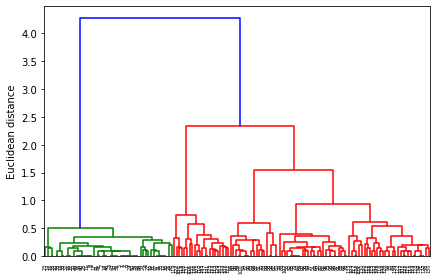

In [74]:
from scipy.cluster.hierarchy import dendrogram

### median

row_dendr = dendrogram(row_clusters_median, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [75]:
# correct approach: Condensed distance matrix : ward

row_clusters_ward = linkage(pdist(df, metric='euclidean'), method='ward')
pd.DataFrame(row_clusters_ward,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,1.0,0.000000,2.0
cluster 2,4.0,150.0,0.000000,3.0
cluster 3,2.0,36.0,0.000000,2.0
cluster 4,3.0,7.0,0.000000,2.0
cluster 5,8.0,151.0,0.000000,4.0
...,...,...,...,...
cluster 145,270.0,293.0,2.409332,28.0
cluster 146,288.0,292.0,3.569174,46.0
cluster 147,291.0,294.0,4.674433,54.0
cluster 148,295.0,296.0,10.527679,100.0


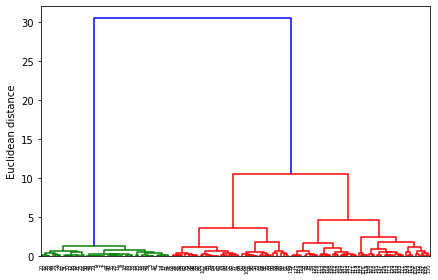

In [76]:
from scipy.cluster.hierarchy import dendrogram

### ward
row_dendr = dendrogram(row_clusters_ward, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

비교적 거리가 길다.

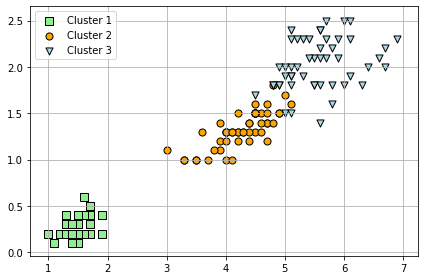

In [77]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y == 2, 0],
            X[y == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

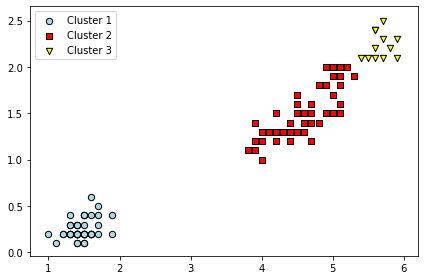

In [78]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.scatter(X[y_db == 2, 0],
            X[y_db == 2, 1],
            s=40, c='yellow',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

DBSCAN으로 보니 1은 잘 감지하지만 위에 그림과 비교 해봤을때 2와 3 부분은 3을 2로 분류하는 모습을 보임